In [1]:
import pandas as pd

In [2]:
from rockstar.models import RockstarCatalogue, RockstarHalo

In [3]:
from core.models import EllipsoidRegion, Category

In [4]:
from django_pandas.io import read_frame

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
cat = RockstarCatalogue.objects.get()

In [7]:
df_selected = pd.read_hdf('../media/selected.hdf5', key='2017-07-24 20:16:20.495943')
selected_ids = df_selected.index
selected_ids

Int64Index([ 79956,  33296,  95915, 116774, 241738, 241466,  33306, 206641,
            229533, 124429,  32879,  70495,  47855, 147062, 136254, 136001,
            206312,  79392, 193602,   1330, 146616, 123930,  21971, 135915,
            181619, 228167,    641, 146457,  21720],
           dtype='int64', name='hid')

In [8]:
halos = RockstarHalo.objects.filter(hid__in=selected_ids)

c = halos[0].catalogue
unit_mass = c.rockstarcatalogue.unit_mass

In [9]:
df = read_frame(halos)
df = df.set_index('hid')

(array([ 14.,   6.,   0.,   3.,   0.,   2.,   1.,   1.,   0.,   2.]),
 array([  1.07200000e+11,   7.77080000e+11,   1.44696000e+12,
          2.11684000e+12,   2.78672000e+12,   3.45660000e+12,
          4.12648000e+12,   4.79636000e+12,   5.46624000e+12,
          6.13612000e+12,   6.80600000e+12]),
 <a list of 10 Patch objects>)

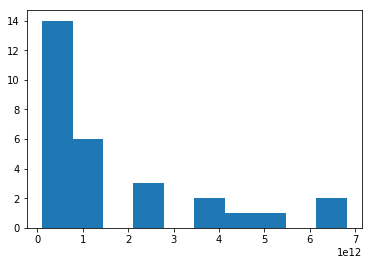

In [10]:
plt.hist(df.mvir * unit_mass)

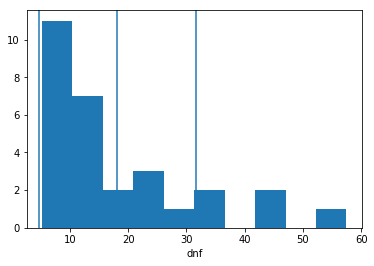

In [11]:
plt.hist(df_selected.dnf)
mean = df_selected.dnf.mean()
std = df_selected.dnf.std()
plt.axvline(mean)
plt.axvline(mean+std)
plt.axvline(mean-std)
plt.xlabel('dnf')

In [12]:
mass = df.mvir
df['mass_unit'] = mass.values * unit_mass.to('Msun')

df = df.sort_values('mvir')

df[['mvir', 'mass_unit']]

,mvir,mass_unit
hid,,
79956,1.072000e+11,1.597377e+11
116774,1.086000e+11,1.618239e+11
241738,1.315000e+11,1.959470e+11
33296,1.339000e+11,1.995232e+11
95915,1.970000e+11,2.935479e+11
206641,2.194000e+11,3.269259e+11
229533,2.757000e+11,4.108181e+11
33306,2.760000e+11,4.112651e+11
124429,3.471000e+11,5.172105e+11


In [13]:
from music.models import GadgetIc
from music.utils import save_pbs_file
category = Category.objects.get(name='selection 2')

In [14]:
ic = GadgetIc.objects.filter(category=category, musicgadgetic__levelmax=12)
ic = ic[0]
ic

<MusicGadgetIc: 124429_DM_L12>

In [15]:
save_pbs_file(ic)

In [16]:
fname = ic.get_config_filename()
name = fname.split('.')[0]
name = name.split('/')[-1]
name

'405_124429_DM_L12'